<a href="https://colab.research.google.com/github/sejallotliker/Advanced_python/blob/main/placement_analysis/placement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/JNCASR/Sem-4/Intro_to_ML/My_practice_ML/placement_data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.isnull().sum()

,0
cgpa,0
package,0


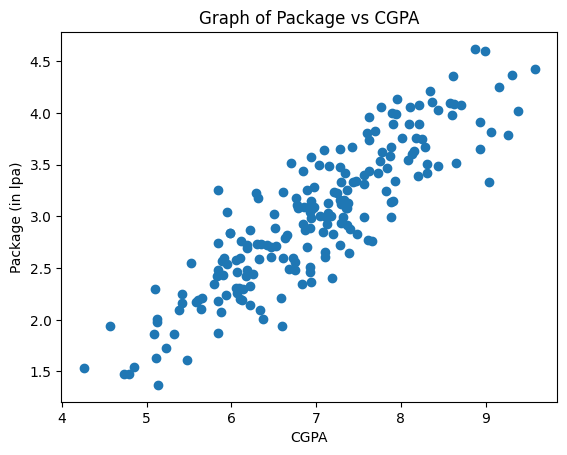

In [4]:
#To plot the data
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['package'])
plt.title("Graph of Package vs CGPA")
plt.xlabel("CGPA")
plt.ylabel("Package (in lpa)")
plt.show()

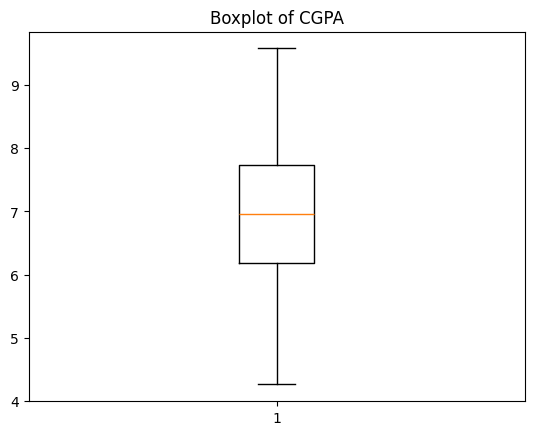

In [5]:
plt.boxplot(df['cgpa'])
plt.title("Boxplot of CGPA")
plt.show()

In [6]:
#Hence we can see that there are no outliers involved...

In [7]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [8]:
#To do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

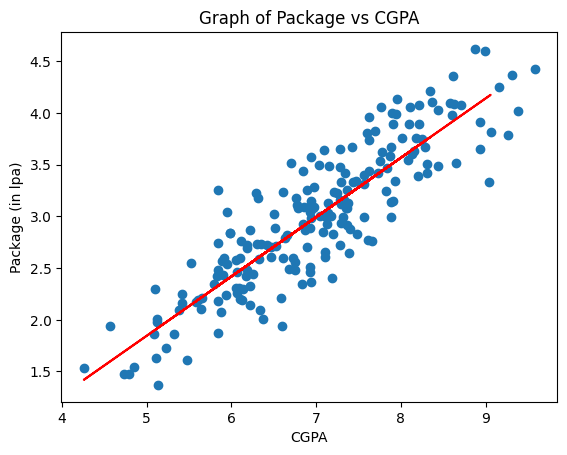

In [11]:
#To plot the data
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, y_pred, color = "red")
plt.title("Graph of Package vs CGPA")
plt.xlabel("CGPA")
plt.ylabel("Package (in lpa)")
plt.show()

In [12]:
m = lr.coef_ ##Slope of the line
m

array([0.57425647])

In [13]:
c = lr.intercept_ #intercept of line
c

np.float64(-1.0270069374542108)

#Evaluation matrix for linear regression

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("R2 score: ", r2)

Mean absolute error:  0.23150985393278373
Mean squared error:  0.08417638361329656
Root mean squared error:  0.2901316659954521
R2 score:  0.7730984312051673


In [22]:
#R2 score is not that great!
#Hence we can use polynomial regression
from sklearn.preprocessing import PolynomialFeatures

r2_values = []
for n in range(10):
  poly = PolynomialFeatures(degree=n)
  X_poly = poly.fit_transform(X)
  poly.fit(X_poly, y)
  lin2 = LinearRegression()
  lin2.fit(X_poly, y)
  y_pred = lin2.predict(X_poly)
  r2 = r2_score(y, y_pred)
  r2_values.append(r2)
  print(f'R2 value for degree {n} is {r2}')

R2 value for degree 0 is 0.0
R2 value for degree 1 is 0.7756192256051151
R2 value for degree 2 is 0.7764161651103308
R2 value for degree 3 is 0.7774144946025789
R2 value for degree 4 is 0.7786681504690034
R2 value for degree 5 is 0.7793576405560062
R2 value for degree 6 is 0.7839805668576022
R2 value for degree 7 is 0.7845292668441458
R2 value for degree 8 is 0.7845509739511409
R2 value for degree 9 is 0.7845093149061466


In [ ]:
lin2 = LinearRegression()
lin2.fit(X_poly, y)

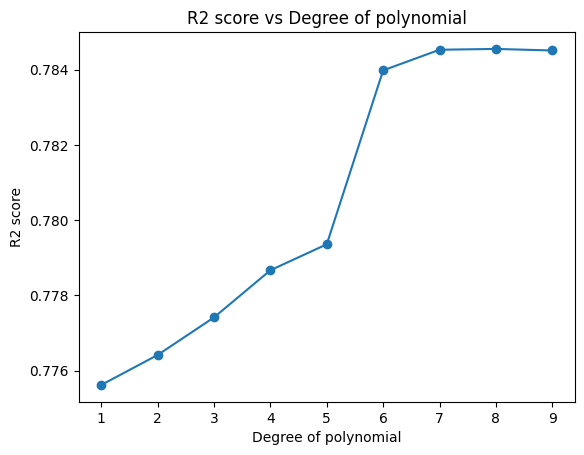

In [46]:
x= [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = r2_values[1:]

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('Degree of polynomial')
plt.ylabel('R2 score')
plt.scatter(x, y)
plt.title('R2 score vs Degree of polynomial')
plt.show()